In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 200

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')

stats:

G = games played\
GS = games started\
MP = minutes played\
PER = player efficiency rating\
TS%	= true shooting percentage (point/(2 x TSA) (a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.)\
3PAr = 3-Point Attempt Rate (3PA / FGA)\
FTr	= Free Throw Rate or FTR is the ratio of Free Throw Attempts to Field Goal Attempts.\
ORB% = Offensive Rebound Percentage\
DRB% = Defensive Rebound Percentage\
TRB% = Total Rebound Percentage\
AST% = Assist Percentage\
STL% = steal percentage\
BLK% = block percentage\
TOV% = Turnover Percentage\
USG% = Usage Percentage\
blanl	\
OWS = Offensive Win Shares\
DWS	= Defensive Win Shares\
WS = Win Shares; an estimate of the number of wins contributed by a player\
WS/48 = Win Shares Per 48 Minutes\
blank2	\
OBPM = offensive Box Plus/Minus\
DBPM = defensive Box Plus/Minus\
BPM	= Box Plus/Minus, metric for evaluating basketball players' quality and contribution to the team\
VORP = Value Over Replacement Player\
FG = Field Goals\
FGA	= Field Goal attempts\
FG%	= Field Goals percentage\
3P = 3 pointers\
3PA	= 3 point attempts\
3P%	= 3 point percentage\
2P = 2-Point Field Goals\
2PA	= 2-Point Field Goals attempts\
2P%	= 2-Point Field Goals percentage\
eFG% = Effective Field Goal Percentage\
FT = Free Throws\
FTA	= Free Throws attempts\
FT%	= Free Throws percentage\
ORB	= Offensive Rebound\
DRB	= defensive rebound\
TRB	= total rebound\
AST	= assists\
STL	= steals\
BLK	= blocks\
TOV	= turnovers\
PF = personal fouls\
PTS = points\

In [2]:
df = pd.read_csv('data/Seasons_stats_complete.csv')

In [17]:
drop_me = ['Unnamed: 0', 'Year', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG%', '3P%', '2P%',
       'eFG%', 'FT%', 'ORB', 'DRB', 'USG%']

In [18]:
df_2011 = df[df['Year']==2011].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2012 = df[df['Year']==2012].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2013 = df[df['Year']==2013].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2014 = df[df['Year']==2014].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2015 = df[df['Year']==2015].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2016 = df[df['Year']==2016].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2017 = df[df['Year']==2017].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2018 = df[df['Year']==2018].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2019 = df[df['Year']==2019].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')

In [19]:
WS_scores = df[df['Year']>2014]['WS']

Text(0, 0.5, 'Counts')

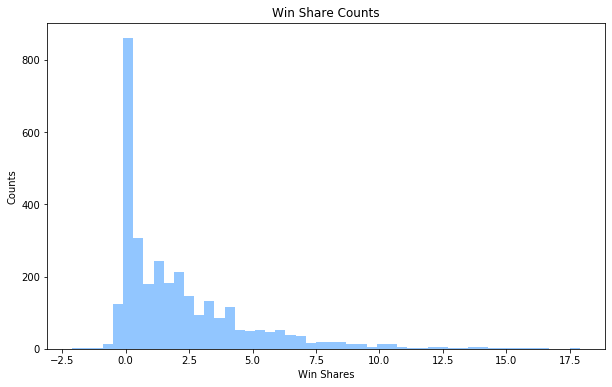

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(WS_scores,bins=50)
ax.set_title('Win Share Counts')
ax.set_xlabel('Win Shares')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

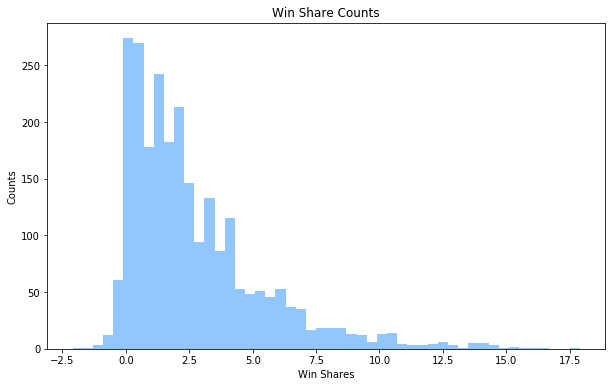

In [21]:
WS_scores = df[(df['Year']>2014) & (df['MP']>200)]['WS']
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(WS_scores,bins=50)
ax.set_title('Win Share Counts')
ax.set_xlabel('Win Shares')
ax.set_ylabel('Counts')

In [22]:
x_for_plots = df_2019[df_2019['MP']>200].drop(columns=['Player'])
y_for_plots = df_2019[df_2019['MP']>200]['WS']
columns = x_for_plots.columns

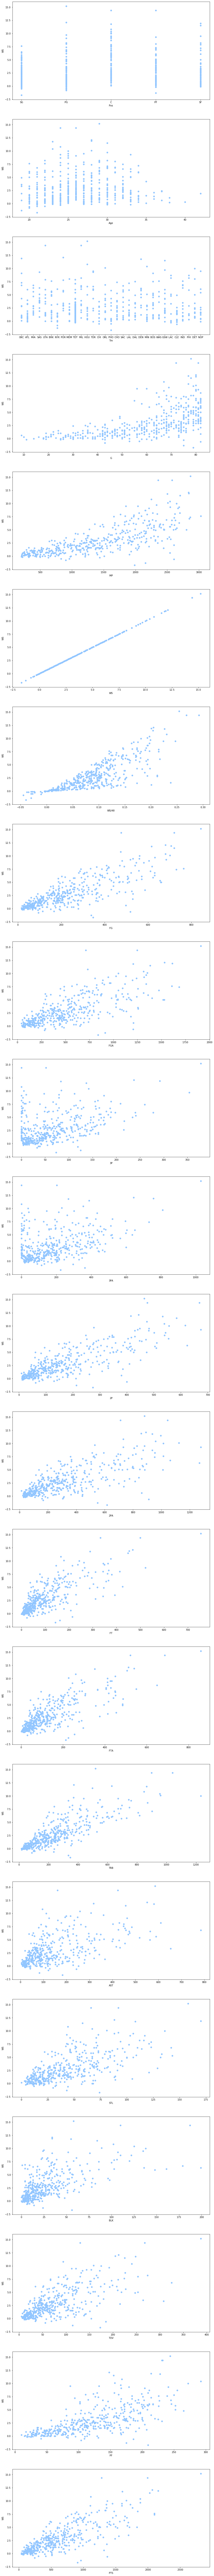

In [23]:
fig, ax = plt.subplots(len(columns),1, figsize=(15,200))
for i, col in enumerate(columns):
    ax[i].scatter(x_for_plots[col], y_for_plots)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('WS')

In [24]:
# scatter_matrix(df_2019,figsize=(15,15))
# plt.show()

In [34]:
merged = df_2011.set_index('Player')\
    .join(df_2012.set_index('Player'),lsuffix='_2011', rsuffix='_2012',how='outer')\
    .join(df_2013.set_index('Player'),lsuffix='_2012', rsuffix='_2013',how='outer')\
    .join(df_2014.set_index('Player'),lsuffix='_2013', rsuffix='_2014',how='outer')\
    .join(df_2015.set_index('Player'),lsuffix='_2014', rsuffix='_2015',how='outer')\
    .join(df_2016.set_index('Player'),lsuffix='_2015', rsuffix='_2016',how='outer')\
    .join(df_2017.set_index('Player'),lsuffix='_2016', rsuffix='_2017',how='outer')\
    .join(df_2018.set_index('Player'),lsuffix='_2017', rsuffix='_2018',how='outer')\
    .join(df_2019.set_index('Player'),rsuffix='_2019',how='outer').reset_index()

In [35]:
merged

Player Pos_2011  Age_2011 Tm_2011  G_2011  MP_2011  WS_2011  \
0           A.J. Hammons      NaN       NaN     NaN     NaN      NaN      NaN   
1             A.J. Price       PG      24.0     IND    50.0    795.0      0.3   
2           Aaron Brooks       PG      26.0     TOT    59.0   1284.0      1.1   
3           Aaron Gordon      NaN       NaN     NaN     NaN      NaN      NaN   
4             Aaron Gray        C      26.0     NOH    41.0    531.0      1.1   
...                  ...      ...       ...     ...     ...      ...      ...   
1206        Zoran Dragic      NaN       NaN     NaN     NaN      NaN      NaN   
1207  Zydrunas Ilgauskas        C      35.0     MIA    72.0   1145.0      2.9   
1208        Álex Abrines      NaN       NaN     NaN     NaN      NaN      NaN   
1209       Ángel Delgado      NaN       NaN     NaN     NaN      NaN      NaN   
1210          Élie Okobo      NaN       NaN     NaN     NaN      NaN      NaN   

      WS/48_2011  FG_2011  FGA_2011  3P_2011  3PA_2011  2P_2011  2PA_2011  \
0            NaN      NaN       NaN      NaN       NaN      NaN       NaN   
1          0.020    114.0     320.0     41.0     149.0     73.0     171.0   
2          0.040    220.0     587.0     70.0     236.0    150.0     351.0   
3            NaN      NaN       NaN      NaN       NaN      NaN       NaN   
4          0.100     56.0      99.0      0.0       0.0     56.0      99.0   
...          ...      ...       ...      ...       ...      ...       ...   
1206         NaN      NaN       NaN      NaN       NaN      NaN       NaN   
1207       0.122    162.0     319.0      0.0       1.0    162.0     318.0   
1208         NaN      NaN       NaN      NaN       NaN      NaN       NaN   
1209         NaN      NaN       NaN      NaN       NaN      NaN       NaN   
1210         NaN      NaN       NaN      NaN       NaN      NaN       NaN   

      FT_2011  FTA_2011  TRB_2011  AST_2011  STL_2011  BLK_2011  TOV_2011  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        54.0      81.0      72.0     111.0      29.0       1.0      53.0   
2       124.0     140.0      78.0     233.0      34.0       3.0      99.0   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        17.0      34.0     171.0      16.0      11.0      12.0      32.0   
...       ...       ...       ...       ...       ...       ...       ...   
1206      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1207     36.0      46.0     287.0      26.0      23.0      58.0      52.0   
1208      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1209      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1210      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

      PF_2011  PTS_2011 Pos_2012  Age_2012 Tm_2012  G_2012  MP_2012  WS_2012  \
0         NaN       NaN      NaN       NaN     NaN     NaN      NaN      NaN   
1        61.0     323.0       PG      25.0     IND    44.0    568.0      0.7   
2       115.0     634.0      NaN       NaN     NaN     NaN      NaN      NaN   
3         NaN       NaN      NaN       NaN     NaN     NaN      NaN      NaN   
4        96.0     129.0        C      27.0     TOR    49.0    813.0      1.4   
...       ...       ...      ...       ...     ...     ...      ...      ...   
1206      NaN       NaN      NaN       NaN     NaN     NaN      NaN      NaN   
1207    185.0     360.0      NaN       NaN     NaN     NaN      NaN      NaN   
1208      NaN       NaN      NaN       NaN     NaN     NaN      NaN      NaN   
1209      NaN       NaN      NaN       NaN     NaN     NaN      NaN      NaN   
1210      NaN       NaN      NaN       NaN     NaN     NaN      NaN      NaN   

      WS/48_2012  FG_2012  FGA_2012  3P_2012  3PA_2012  2P_2012  2PA_2012  \
0            NaN      NaN       NaN      NaN       NaN      NaN       NaN   
1          0.063     59.0     174.0     26.0      88.0     33.0      86.0   
2  

In [45]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
train_2015_2018 = merged.copy()
train_2015_2018 = train_2015_2018.drop(merged.filter(regex='2011').columns, axis=1)
train_2015_2018 = train_2015_2018.drop(merged.filter(regex='2012').columns, axis=1)
train_2015_2018 = train_2015_2018.drop(merged.filter(regex='2013').columns, axis=1)
train_2015_2018 = train_2015_2018.drop(merged.filter(regex='2014').columns, axis=1)
train_2015_2018 = train_2015_2018.drop(columns=drop_2019)
train_2015_2018 = train_2015_2018.dropna(subset=['TRB_2017', 'TRB_2018'])
train_2015_2018 = train_2015_2018[train_2015_2018['MP_2018']>200]
train_2015_2018 = train_2015_2018.fillna(0)

In [46]:
columns = train_2015_2018.columns
columns

Index(['Player', 'Pos_2015', 'Age_2015', 'Tm_2015', 'G_2015', 'MP_2015',
       'WS_2015', 'WS/48_2015', 'FG_2015', 'FGA_2015', '3P_2015', '3PA_2015',
       '2P_2015', '2PA_2015', 'FT_2015', 'FTA_2015', 'TRB_2015', 'AST_2015',
       'STL_2015', 'BLK_2015', 'TOV_2015', 'PF_2015', 'PTS_2015', 'Pos_2016',
       'Age_2016', 'Tm_2016', 'G_2016', 'MP_2016', 'WS_2016', 'WS/48_2016',
       'FG_2016', 'FGA_2016', '3P_2016', '3PA_2016', '2P_2016', '2PA_2016',
       'FT_2016', 'FTA_2016', 'TRB_2016', 'AST_2016', 'STL_2016', 'BLK_2016',
       'TOV_2016', 'PF_2016', 'PTS_2016', 'Pos_2017', 'Age_2017', 'Tm_2017',
       'G_2017', 'MP_2017', 'WS_2017', 'WS/48_2017', 'FG_2017', 'FGA_2017',
       '3P_2017', '3PA_2017', '2P_2017', '2PA_2017', 'FT_2017', 'FTA_2017',
       'TRB_2017', 'AST_2017', 'STL_2017', 'BLK_2017', 'TOV_2017', 'PF_2017',
       'PTS_2017', 'Pos_2018', 'Age_2018', 'Tm_2018', 'G_2018', 'MP_2018',
       'WS_2018', 'WS/48_2018', 'FG_2018', 'FGA_2018', '3P_2018', '3PA_2018',
    

In [47]:
drop_me = ['Player', 'Pos_2015',
       'Tm_2015', 'Pos_2016', 'Tm_2016', 'Pos_2017', 'Tm_2017', 'Pos_2018',
       'Age_2018', 'Tm_2018', 'G_2018', 'MP_2018', 'WS_2018','WS/48_2018',
       'FG_2018', 'FGA_2018', '3P_2018', '3PA_2018', '2P_2018', '2PA_2018',
       'FT_2018', 'FTA_2018', 'TRB_2018', 'AST_2018', 'STL_2018', 'BLK_2018',
       'TOV_2018', 'PF_2018', 'PTS_2018']
X_2015_2018 = train_2015_2018.drop(columns=drop_me)
y_2015_2018 = train_2015_2018['WS/48_2018']

In [48]:
X_2015_2018

Age_2015  G_2015  MP_2015  WS_2015  WS/48_2015  FG_2015  FGA_2015  \
3         19.0    47.0    797.0      1.0       0.060     93.0     208.0   
5          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
13        28.0    76.0   2318.0      8.7       0.179    519.0     965.0   
14        30.0    65.0   1992.0      4.7       0.113    486.0    1010.0   
16        24.0    74.0   1366.0      3.3       0.115    147.0     357.0   
...        ...     ...      ...      ...         ...      ...       ...   
1188      27.0    78.0   2471.0      3.6       0.071    418.0     975.0   
1196       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1200      19.0    77.0   1902.0     -0.7      -0.018    286.0     677.0   
1202      33.0    71.0   2304.0      7.2       0.149    454.0     932.0   
1203      30.0    73.0   1730.0      4.2       0.116    240.0     529.0   

      3P_2015  3PA_2015  2P_2015  2PA_2015  FT_2015  FTA_2015  TRB_2015  \
3        13.0      48.0     80.0     160.0     44.0      61.0     169.0   
5         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
13       11.0      36.0    508.0     929.0    107.0     141.0     544.0   
14        2.0       5.0    484.0    1005.0    108.0     165.0     548.0   
16       34.0     124.0    113.0     233.0     84.0     118.0     342.0   
...       ...       ...      ...       ...      ...       ...       ...   
1188    139.0     406.0    279.0     569.0    110.0     142.0     475.0   
1196      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1200     57.0     167.0    229.0     510.0    149.0     177.0     214.0   
1202      7.0      20.0    447.0     912.0    228.0     298.0     747.0   
1203      0.0       3.0    240.0     526.0    126.0     160.0     500.0   

      AST_2015  STL_2015  BLK_2015  TOV_2015  PF_2015  PTS_2015  Age_2016  \
3         33.0      21.0      22.0      38.0     83.0     243.0      20.0   
5          0.0       0.0       0.0       0.0      0.0       0.0      21.0   
13       244.0      68.0      98.0     100.0    121.0    1156.0      29.0   
14       113.0      47.0      84.0      68.0    139.0    1082.0      31.0   
16        59.0      70.0      62.0      55.0    137.0     412.0      25.0   
...        ...       ...       ...       ...      ...       ...       ...   
1188     134.0      58.0      29.0     110.0    231.0    1085.0       0.0   
1196       0.0       0.0       0.0       0.0      0.0       0.0       0.0   
1200     276.0      54.0      10.0     193.0    158.0     778.0      20.0   
1202     153.0      69.0      14.0     156.0    175.0    1143.0      34.0   
1203     178.0      80.0      21.0     133.0    170.0     606.0      31.0   

      G_2016  MP_2016  WS_2016  WS/48_2016  FG_2016  FGA_2016  3P_2016  \
3       78.0   1863.0      5.4       0.139    274.0     579.0     42.0   
5       21.0     93.0      0.0      -0.014      5.0      19.0      3.0   
13      82.0   2631.0      9.4       0.172    529.0    1048.0     88.0   
14      47.0   1096.0      2.8       0.123    245.0     505.0      0.0   
16      82.0   2341.0      4.0       0.082    299.0     719.0    126.0   
...      ...      ...      ...         ...      ...       ...      ...   
1188     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1196     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1200    82.0   2294.0      2.6       0.054    433.0     959.0    123.0   
1202    68.0   2016.0      4.3       0.103    431.0     907.0      6.0   
1203    76.0   2004.0      6.0       0.145    219.0     470.0      0.0   

      3PA_2016  2P_2016  2PA_2016  FT_2016  FTA_2016  TRB_2016  AST_2016  \
3        142.0    232.0     437.0    129.0     193.0     507.0     128.0   
5         10.0      2.0       9.0      5.0      12.0      15.0       2.0   
13       256.0    441.0     792.0    103.0     129.0     596.0     263.0   
14         0.0    245.0     505.0     72.0     111.0     301.0      70.0   
16       3

In [51]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
train_2011_2014 = merged.copy()
train_2011_2014 = train_2011_2014.drop(merged.filter(regex='2015').columns, axis=1)
train_2011_2014 = train_2011_2014.drop(merged.filter(regex='2016').columns, axis=1)
train_2011_2014 = train_2011_2014.drop(merged.filter(regex='2017').columns, axis=1)
train_2011_2014 = train_2011_2014.drop(merged.filter(regex='2018').columns, axis=1)
train_2011_2014 = train_2011_2014.drop(columns=drop_2019)
train_2011_2014 = train_2011_2014.dropna(subset=['TRB_2013', 'TRB_2014'])
train_2011_2014 = train_2011_2014[train_2011_2014['MP_2014']>200]
train_2011_2014 = train_2011_2014.fillna(0)

In [52]:
columns = train_2011_2014.columns
columns

Index(['Player', 'Pos_2011', 'Age_2011', 'Tm_2011', 'G_2011', 'MP_2011',
       'WS_2011', 'WS/48_2011', 'FG_2011', 'FGA_2011', '3P_2011', '3PA_2011',
       '2P_2011', '2PA_2011', 'FT_2011', 'FTA_2011', 'TRB_2011', 'AST_2011',
       'STL_2011', 'BLK_2011', 'TOV_2011', 'PF_2011', 'PTS_2011', 'Pos_2012',
       'Age_2012', 'Tm_2012', 'G_2012', 'MP_2012', 'WS_2012', 'WS/48_2012',
       'FG_2012', 'FGA_2012', '3P_2012', '3PA_2012', '2P_2012', '2PA_2012',
       'FT_2012', 'FTA_2012', 'TRB_2012', 'AST_2012', 'STL_2012', 'BLK_2012',
       'TOV_2012', 'PF_2012', 'PTS_2012', 'Pos_2013', 'Age_2013', 'Tm_2013',
       'G_2013', 'MP_2013', 'WS_2013', 'WS/48_2013', 'FG_2013', 'FGA_2013',
       '3P_2013', '3PA_2013', '2P_2013', '2PA_2013', 'FT_2013', 'FTA_2013',
       'TRB_2013', 'AST_2013', 'STL_2013', 'BLK_2013', 'TOV_2013', 'PF_2013',
       'PTS_2013', 'Pos_2014', 'Age_2014', 'Tm_2014', 'G_2014', 'MP_2014',
       'WS_2014', 'WS/48_2014', 'FG_2014', 'FGA_2014', '3P_2014', '3PA_2014',
    

In [55]:
drop_me = ['Player', 'Pos_2011',
       'Tm_2011', 'Pos_2012', 'Tm_2012', 'Pos_2013', 'Tm_2013', 'Pos_2014', 'Age_2014', 'Tm_2014', 'G_2014', 'MP_2014',
       'WS_2014', 'WS/48_2014', 'FG_2014', 'FGA_2014', '3P_2014', '3PA_2014',
       '2P_2014', '2PA_2014', 'FT_2014', 'FTA_2014', 'TRB_2014', 'AST_2014',
       'STL_2014', 'BLK_2014', 'TOV_2014', 'PF_2014', 'PTS_2014']
X_2011_2014 = train_2011_2014.drop(columns=drop_me)
y_2011_2014 = train_2011_2014['WS/48_2014']

In [56]:
X_2011_2014

Age_2011  G_2011  MP_2011  WS_2011  WS/48_2011  FG_2011  FGA_2011  \
2         26.0    59.0   1284.0      1.1       0.040    220.0     587.0   
4         26.0    41.0    531.0      1.1       0.100     56.0      99.0   
12        30.0    73.0   1665.0      2.1       0.060    281.0     675.0   
13        24.0    77.0   2704.0     10.1       0.179    513.0     921.0   
14        26.0    82.0   2940.0      7.8       0.128    654.0    1319.0   
...        ...     ...      ...      ...         ...      ...       ...   
1183      29.0    77.0   1674.0      1.8       0.052    270.0     609.0   
1188      23.0    72.0   2401.0      3.9       0.079    429.0     953.0   
1189      19.0    38.0    527.0      0.2       0.021     65.0     160.0   
1202      29.0    75.0   2724.0     10.5       0.185    598.0    1188.0   
1203      26.0    79.0   1244.0      3.1       0.118    107.0     232.0   

      3P_2011  3PA_2011  2P_2011  2PA_2011  FT_2011  FTA_2011  TRB_2011  \
2        70.0     236.0    150.0     351.0    124.0     140.0      78.0   
4         0.0       0.0     56.0      99.0     17.0      34.0     171.0   
12      117.0     328.0    164.0     347.0     86.0     117.0     332.0   
13        2.0       4.0    511.0     917.0    150.0     188.0     718.0   
14        0.0       0.0    654.0    1319.0    220.0     289.0     794.0   
...       ...       ...      ...       ...      ...       ...       ...   
1183     54.0     155.0    216.0     454.0     78.0     100.0     161.0   
1188    112.0     320.0    317.0     633.0    130.0     161.0     408.0   
1189      2.0      17.0     63.0     143.0     33.0      52.0      37.0   
1202      8.0      43.0    590.0    1145.0    300.0     396.0     914.0   
1203      0.0       0.0    107.0     232.0    135.0     179.0     333.0   

      AST_2011  STL_2011  BLK_2011  TOV_2011  PF_2011  PTS_2011  Age_2012  \
2        233.0      34.0       3.0      99.0    115.0     634.0       0.0   
4         16.0      11.0      12.0      32.0     96.0     129.0      27.0   
12       101.0      39.0      10.0     106.0    202.0     765.0      31.0   
13       266.0      59.0      80.0     119.0    193.0    1178.0      25.0   
14       149.0      46.0     153.0     105.0    238.0    1528.0      27.0   
...        ...       ...       ...       ...      ...       ...       ...   
1183      74.0      36.0      13.0      67.0    143.0     672.0      30.0   
1188     120.0      48.0      94.0     104.0    199.0    1100.0      24.0   
1189      18.0      11.0       3.0      13.0     48.0     165.0      20.0   
1202     163.0      63.0      25.0     151.0    175.0    1504.0      30.0   
1203      58.0      34.0      22.0      69.0    184.0     349.0      27.0   

      G_2012  MP_2012  WS_2012  WS/48_2012  FG_2012  FGA_2012  3P_2012  \
2        0.0      0.0      0.0       0.000      0.0       0.0      0.0   
4       49.0    813.0      1.4       0.082     83.0     161.0      0.0   
12      64.0   1761.0      3.2       0.088    345.0     773.0    101.0   
13      11.0    348.0      1.3       0.180     57.0     103.0      0.0   
14      61.0   2075.0      7.5       0.173    516.0    1048.0      1.0   
...      ...      ...      ...         ...      ...       ...      ...   
1183    53.0    922.0      2.4       0.122    153.0     325.0     50.0   
1188     8.0    215.0     -0.1      -0.021     31.0      79.0      3.0   
1189    45.0    759.0      0.2       0.015     90.0     228.0      7.0   
1202    28.0    735.0      2.1       0.135    132.0     285.0      2.0   
1203    58.0   1640.0      5.0       0.147    169.0     339.0      0.0   

      3PA_2012  2P_2012  2PA_2012  FT_2012  FTA_2012  TRB_2012  AST_2012  \
2          0.0      0.0       0.0      0.0       0.0       0.0       0.0   
4          0.0     83.0     161.0     25.0      47.0     281.0      27.0   
12       303.0    244.0     470.0    119.0     176.0     390.0      88.0   
13         1.0     57.0     102.0     22.0      30.0      77.0      24.0   
14        

In [57]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
train_2012_2015 = merged.copy()
train_2012_2015 = train_2012_2015.drop(merged.filter(regex='2011').columns, axis=1)
train_2012_2015 = train_2012_2015.drop(merged.filter(regex='2016').columns, axis=1)
train_2012_2015 = train_2012_2015.drop(merged.filter(regex='2017').columns, axis=1)
train_2012_2015 = train_2012_2015.drop(merged.filter(regex='2018').columns, axis=1)
train_2012_2015 = train_2012_2015.drop(columns=drop_2019)
train_2012_2015 = train_2012_2015.dropna(subset=['TRB_2014', 'TRB_2015'])
train_2012_2015 = train_2012_2015[train_2012_2015['MP_2014']>200]
train_2012_2015 = train_2012_2015.fillna(0)

In [58]:
columns = train_2012_2015.columns
columns

Index(['Player', 'Pos_2012', 'Age_2012', 'Tm_2012', 'G_2012', 'MP_2012',
       'WS_2012', 'WS/48_2012', 'FG_2012', 'FGA_2012', '3P_2012', '3PA_2012',
       '2P_2012', '2PA_2012', 'FT_2012', 'FTA_2012', 'TRB_2012', 'AST_2012',
       'STL_2012', 'BLK_2012', 'TOV_2012', 'PF_2012', 'PTS_2012', 'Pos_2013',
       'Age_2013', 'Tm_2013', 'G_2013', 'MP_2013', 'WS_2013', 'WS/48_2013',
       'FG_2013', 'FGA_2013', '3P_2013', '3PA_2013', '2P_2013', '2PA_2013',
       'FT_2013', 'FTA_2013', 'TRB_2013', 'AST_2013', 'STL_2013', 'BLK_2013',
       'TOV_2013', 'PF_2013', 'PTS_2013', 'Pos_2014', 'Age_2014', 'Tm_2014',
       'G_2014', 'MP_2014', 'WS_2014', 'WS/48_2014', 'FG_2014', 'FGA_2014',
       '3P_2014', '3PA_2014', '2P_2014', '2PA_2014', 'FT_2014', 'FTA_2014',
       'TRB_2014', 'AST_2014', 'STL_2014', 'BLK_2014', 'TOV_2014', 'PF_2014',
       'PTS_2014', 'Pos_2015', 'Age_2015', 'Tm_2015', 'G_2015', 'MP_2015',
       'WS_2015', 'WS/48_2015', 'FG_2015', 'FGA_2015', '3P_2015', '3PA_2015',
    

In [59]:
drop_me = ['Player', 'Pos_2014',
       'Tm_2014', 'Pos_2012', 'Tm_2012', 'Pos_2013', 'Tm_2013', 'Pos_2015', 'Age_2015', 'Tm_2015', 'G_2015', 'MP_2015',
       'WS_2015', 'WS/48_2015', 'FG_2015', 'FGA_2015', '3P_2015', '3PA_2015',
       '2P_2015', '2PA_2015', 'FT_2015', 'FTA_2015', 'TRB_2015', 'AST_2015',
       'STL_2015', 'BLK_2015', 'TOV_2015', 'PF_2015', 'PTS_2015']
X_2012_2015 = train_2012_2015.drop(columns=drop_me)
y_2012_2015 = train_2012_2015['WS/48_2015']

In [61]:
X_2012_2015

Age_2012  G_2012  MP_2012  WS_2012  WS/48_2012  FG_2012  FGA_2012  \
2          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
13        25.0    11.0    348.0      1.3       0.180     57.0     103.0   
14        27.0    61.0   2075.0      7.5       0.173    516.0    1048.0   
16        21.0    66.0   1477.0      1.4       0.044    150.0     365.0   
17        29.0    17.0    461.0      0.3       0.032     55.0     142.0   
...        ...     ...      ...      ...         ...      ...       ...   
1183      30.0    53.0    922.0      2.4       0.122    153.0     325.0   
1188      24.0     8.0    215.0     -0.1      -0.021     31.0      79.0   
1189      20.0    45.0    759.0      0.2       0.015     90.0     228.0   
1202      30.0    28.0    735.0      2.1       0.135    132.0     285.0   
1203      27.0    58.0   1640.0      5.0       0.147    169.0     339.0   

      3P_2012  3PA_2012  2P_2012  2PA_2012  FT_2012  FTA_2012  TRB_2012  \
2         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
13        0.0       1.0     57.0     102.0     22.0      30.0      77.0   
14        1.0       4.0    515.0    1044.0    137.0     177.0     585.0   
16       13.0      47.0    137.0     318.0     86.0     114.0     308.0   
17       24.0      61.0     31.0      81.0     29.0      34.0      34.0   
...       ...       ...      ...       ...      ...       ...       ...   
1183     50.0     113.0    103.0     212.0     48.0      56.0      80.0   
1188      3.0      12.0     28.0      67.0     10.0      12.0      41.0   
1189      7.0      17.0     83.0     211.0     52.0      85.0     106.0   
1202      2.0       8.0    130.0     277.0     58.0      88.0     225.0   
1203      0.0       0.0    169.0     339.0    117.0     158.0     457.0   

      AST_2012  STL_2012  BLK_2012  TOV_2012  PF_2012  PTS_2012  Age_2013  \
2          0.0       0.0       0.0       0.0      0.0       0.0      28.0   
13        24.0      10.0      14.0      16.0     21.0     136.0      26.0   
14       134.0      47.0     101.0      62.0    155.0    1170.0      28.0   
16        66.0      59.0      34.0      91.0    136.0     399.0      22.0   
17        26.0       5.0       3.0      25.0     35.0     163.0      30.0   
...        ...       ...       ...       ...      ...       ...       ...   
1183      40.0      23.0       6.0      33.0     74.0     404.0      31.0   
1188      17.0       6.0       6.0      18.0     18.0      75.0      25.0   
1189      35.0      26.0       8.0      35.0     59.0     239.0      21.0   
1202      48.0      21.0       4.0      40.0     57.0     324.0      31.0   
1203      79.0      55.0      29.0      81.0    172.0     455.0      28.0   

      G_2013  MP_2013  WS_2013  WS/48_2013  FG_2013  FGA_2013  3P_2013  \
2       53.0    997.0      0.8       0.041    143.0     316.0     50.0   
13      74.0   2756.0      8.8       0.153    576.0    1060.0      3.0   
14      78.0   2578.0      7.7       0.143    611.0    1236.0      2.0   
16      76.0   2066.0      3.1       0.073    225.0     474.0      4.0   
17      65.0   1495.0      1.6       0.052    236.0     616.0     95.0   
...      ...      ...      ...         ...      ...       ...      ...   
1183    72.0   1188.0      2.5       0.103    178.0     386.0     71.0   
1188    43.0   1079.0      3.1       0.137    210.0     455.0     52.0   
1189    50.0    625.0      0.0       0.002     66.0     161.0      4.0   
1202    76.0   2607.0      7.9       0.145    471.0    1024.0      2.0   
1203    52.0   1134.0      2.7       0.116    114.0     241.0      0.0   

      3PA_2013  2P_2013  2PA_2013  FT_2013  FTA_2013  TRB_2013  AST_2013  \
2        134.0     93.0     182.0     40.0      52.0      80.0     114.0   
13         6.0    573.0    1054.0    134.0     208.0     757.0     240.0   
14        17.0    609.0    1219.0    167.0     217.0     720.0     164.0   
16        19.0    221.0     455.0    101.0     137.0     585.0     103.0   
17       2

In [62]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
train_2013_2016 = merged.copy()
train_2013_2016 = train_2013_2016.drop(merged.filter(regex='2011').columns, axis=1)
train_2013_2016 = train_2013_2016.drop(merged.filter(regex='2012').columns, axis=1)
train_2013_2016 = train_2013_2016.drop(merged.filter(regex='2017').columns, axis=1)
train_2013_2016 = train_2013_2016.drop(merged.filter(regex='2018').columns, axis=1)
train_2013_2016 = train_2013_2016.drop(columns=drop_2019)
train_2013_2016 = train_2013_2016.dropna(subset=['TRB_2015', 'TRB_2016'])
train_2013_2016 = train_2013_2016[train_2013_2016['MP_2016']>200]
train_2013_2016 = train_2013_2016.fillna(0)

In [63]:
columns = train_2013_2016.columns
columns

Index(['Player', 'Pos_2013', 'Age_2013', 'Tm_2013', 'G_2013', 'MP_2013',
       'WS_2013', 'WS/48_2013', 'FG_2013', 'FGA_2013', '3P_2013', '3PA_2013',
       '2P_2013', '2PA_2013', 'FT_2013', 'FTA_2013', 'TRB_2013', 'AST_2013',
       'STL_2013', 'BLK_2013', 'TOV_2013', 'PF_2013', 'PTS_2013', 'Pos_2014',
       'Age_2014', 'Tm_2014', 'G_2014', 'MP_2014', 'WS_2014', 'WS/48_2014',
       'FG_2014', 'FGA_2014', '3P_2014', '3PA_2014', '2P_2014', '2PA_2014',
       'FT_2014', 'FTA_2014', 'TRB_2014', 'AST_2014', 'STL_2014', 'BLK_2014',
       'TOV_2014', 'PF_2014', 'PTS_2014', 'Pos_2015', 'Age_2015', 'Tm_2015',
       'G_2015', 'MP_2015', 'WS_2015', 'WS/48_2015', 'FG_2015', 'FGA_2015',
       '3P_2015', '3PA_2015', '2P_2015', '2PA_2015', 'FT_2015', 'FTA_2015',
       'TRB_2015', 'AST_2015', 'STL_2015', 'BLK_2015', 'TOV_2015', 'PF_2015',
       'PTS_2015', 'Pos_2016', 'Age_2016', 'Tm_2016', 'G_2016', 'MP_2016',
       'WS_2016', 'WS/48_2016', 'FG_2016', 'FGA_2016', '3P_2016', '3PA_2016',
    

In [64]:
drop_me = ['Player', 'Pos_2013',
       'Tm_2013', 'Pos_2014', 'Tm_2014', 'Pos_2015', 'Tm_2015', 'Pos_2016', 'Age_2016', 'Tm_2016', 'G_2016', 'MP_2016',
       'WS_2016', 'WS/48_2016', 'FG_2016', 'FGA_2016', '3P_2016', '3PA_2016',
       '2P_2016', '2PA_2016', 'FT_2016', 'FTA_2016', 'TRB_2016', 'AST_2016',
       'STL_2016', 'BLK_2016', 'TOV_2016', 'PF_2016', 'PTS_2016']
X_2013_2016 = train_2013_2016.drop(columns=drop_me)
y_2013_2016 = train_2013_2016['WS/48_2016']

In [65]:
X_2013_2016

Age_2013  G_2013  MP_2013  WS_2013  WS/48_2013  FG_2013  FGA_2013  \
2         28.0    53.0    997.0      0.8       0.041    143.0     316.0   
3          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
11         0.0     0.0      0.0      0.0       0.000      0.0       0.0   
13        26.0    74.0   2756.0      8.8       0.153    576.0    1060.0   
14        28.0    78.0   2578.0      7.7       0.143    611.0    1236.0   
...        ...     ...      ...      ...         ...      ...       ...   
1177      26.0    69.0   2403.0      4.7       0.093    352.0     808.0   
1178      22.0    73.0    894.0     -0.5      -0.028    118.0     309.0   
1200       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1202      31.0    76.0   2607.0      7.9       0.145    471.0    1024.0   
1203      28.0    52.0   1134.0      2.7       0.116    114.0     241.0   

      3P_2013  3PA_2013  2P_2013  2PA_2013  FT_2013  FTA_2013  TRB_2013  \
2        50.0     134.0     93.0     182.0     40.0      52.0      80.0   
3         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
11        0.0       0.0      0.0       0.0      0.0       0.0       0.0   
13        3.0       6.0    573.0    1054.0    134.0     208.0     757.0   
14        2.0      17.0    609.0    1219.0    167.0     217.0     720.0   
...       ...       ...      ...       ...      ...       ...       ...   
1177    169.0     425.0    183.0     383.0    149.0     187.0     191.0   
1178      9.0      65.0    109.0     244.0     50.0      65.0     145.0   
1200      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1202      2.0      23.0    469.0    1001.0    225.0     300.0     854.0   
1203      0.0       3.0    114.0     238.0     78.0     103.0     336.0   

      AST_2013  STL_2013  BLK_2013  TOV_2013  PF_2013  PTS_2013  Age_2014  \
2        114.0      30.0      10.0      67.0     94.0     376.0      29.0   
3          0.0       0.0       0.0       0.0      0.0       0.0       0.0   
11         0.0       0.0       0.0       0.0      0.0       0.0       0.0   
13       240.0      78.0      78.0     147.0    163.0    1289.0      27.0   
14       164.0      80.0      89.0     105.0    170.0    1391.0      29.0   
...        ...       ...       ...       ...      ...       ...       ...   
1177     174.0      90.0      18.0     109.0    172.0    1022.0      27.0   
1178      58.0      34.0       9.0      60.0     56.0     295.0      23.0   
1200       0.0       0.0       0.0       0.0      0.0       0.0       0.0   
1202     108.0      61.0      31.0     150.0    180.0    1169.0      32.0   
1203      79.0      35.0      12.0      70.0    128.0     306.0      29.0   

      G_2014  MP_2014  WS_2014  WS/48_2014  FG_2014  FGA_2014  3P_2014  \
2       72.0   1557.0      2.2       0.067    233.0     581.0     96.0   
3        0.0      0.0      0.0       0.000      0.0       0.0      0.0   
11       0.0      0.0      0.0       0.000      0.0       0.0      0.0   
13      29.0    958.0      2.8       0.141    238.0     420.0      4.0   
14      73.0   2553.0      7.8       0.146    700.0    1376.0      3.0   
...      ...      ...      ...         ...      ...       ...      ...   
1177    82.0   2780.0      8.2       0.142    445.0    1009.0    201.0   
1178    41.0    387.0      0.6       0.078     65.0     156.0     10.0   
1200     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1202    79.0   2705.0      6.4       0.113    560.0    1198.0      2.0   
1203    53.0   1325.0      1.7       0.060    149.0     349.0      0.0   

      3PA_2014  2P_2014  2PA_2014  FT_2014  FTA_2014  TRB_2014  AST_2014  \
2        248.0    137.0     333.0     83.0      95.0     140.0     233.0   
3          0.0      0.0       0.0      0.0       0.0       0.0       0.0   
11         0.0      0.0       0.0      0.0       0.0       0.0       0.0   
13        11.0    234.0     409.0     58.0      85.0     244.0      76.0   
14        

In [66]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
train_2014_2017 = merged.copy()
train_2014_2017 = train_2014_2017.drop(merged.filter(regex='2011').columns, axis=1)
train_2014_2017 = train_2014_2017.drop(merged.filter(regex='2012').columns, axis=1)
train_2014_2017 = train_2014_2017.drop(merged.filter(regex='2013').columns, axis=1)
train_2014_2017 = train_2014_2017.drop(merged.filter(regex='2018').columns, axis=1)
train_2014_2017 = train_2014_2017.drop(columns=drop_2019)
train_2014_2017 = train_2014_2017.dropna(subset=['TRB_2016', 'TRB_2017'])
train_2014_2017 = train_2014_2017[train_2014_2017['MP_2017']>200]
train_2014_2017 = train_2014_2017.fillna(0)

In [67]:
columns = train_2014_2017.columns
columns

Index(['Player', 'Pos_2014', 'Age_2014', 'Tm_2014', 'G_2014', 'MP_2014',
       'WS_2014', 'WS/48_2014', 'FG_2014', 'FGA_2014', '3P_2014', '3PA_2014',
       '2P_2014', '2PA_2014', 'FT_2014', 'FTA_2014', 'TRB_2014', 'AST_2014',
       'STL_2014', 'BLK_2014', 'TOV_2014', 'PF_2014', 'PTS_2014', 'Pos_2015',
       'Age_2015', 'Tm_2015', 'G_2015', 'MP_2015', 'WS_2015', 'WS/48_2015',
       'FG_2015', 'FGA_2015', '3P_2015', '3PA_2015', '2P_2015', '2PA_2015',
       'FT_2015', 'FTA_2015', 'TRB_2015', 'AST_2015', 'STL_2015', 'BLK_2015',
       'TOV_2015', 'PF_2015', 'PTS_2015', 'Pos_2016', 'Age_2016', 'Tm_2016',
       'G_2016', 'MP_2016', 'WS_2016', 'WS/48_2016', 'FG_2016', 'FGA_2016',
       '3P_2016', '3PA_2016', '2P_2016', '2PA_2016', 'FT_2016', 'FTA_2016',
       'TRB_2016', 'AST_2016', 'STL_2016', 'BLK_2016', 'TOV_2016', 'PF_2016',
       'PTS_2016', 'Pos_2017', 'Age_2017', 'Tm_2017', 'G_2017', 'MP_2017',
       'WS_2017', 'WS/48_2017', 'FG_2017', 'FGA_2017', '3P_2017', '3PA_2017',
    

In [68]:
drop_me = ['Player', 'Pos_2014',
       'Tm_2014', 'Pos_2015', 'Tm_2015', 'Pos_2016', 'Tm_2016', 'Pos_2017', 'Age_2017', 'Tm_2017', 'G_2017', 'MP_2017',
       'WS_2017', 'WS/48_2017', 'FG_2017', 'FGA_2017', '3P_2017', '3PA_2017',
       '2P_2017', '2PA_2017', 'FT_2017', 'FTA_2017', 'TRB_2017', 'AST_2017',
       'STL_2017', 'BLK_2017', 'TOV_2017', 'PF_2017', 'PTS_2017']
X_2014_2017 = train_2014_2017.drop(columns=drop_me)
y_2014_2017 = train_2014_2017['WS/48_2017']

In [69]:
X_2014_2017

Age_2014  G_2014  MP_2014  WS_2014  WS/48_2014  FG_2014  FGA_2014  \
2         29.0    72.0   1557.0      2.2       0.067    233.0     581.0   
3          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
13        27.0    29.0    958.0      2.8       0.141    238.0     420.0   
14        29.0    73.0   2553.0      7.8       0.146    700.0    1376.0   
16        23.0    80.0   2045.0      3.1       0.072    234.0     494.0   
...        ...     ...      ...      ...         ...      ...       ...   
1182       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1184       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1200       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1202      32.0    79.0   2705.0      6.4       0.113    560.0    1198.0   
1203      29.0    53.0   1325.0      1.7       0.060    149.0     349.0   

      3P_2014  3PA_2014  2P_2014  2PA_2014  FT_2014  FTA_2014  TRB_2014  \
2        96.0     248.0    137.0     333.0     83.0      95.0     140.0   
3         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
13        4.0      11.0    234.0     409.0     58.0      85.0     244.0   
14        3.0      15.0    697.0    1361.0    191.0     277.0     792.0   
16       13.0      48.0    221.0     446.0     91.0     137.0     496.0   
...       ...       ...      ...       ...      ...       ...       ...   
1182      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1184      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1200      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1202      2.0      20.0    558.0    1178.0    250.0     337.0     795.0   
1203      0.0       1.0    149.0     348.0    110.0     130.0     333.0   

      AST_2014  STL_2014  BLK_2014  TOV_2014  PF_2014  PTS_2014  Age_2015  \
2        233.0      52.0      13.0     117.0    146.0     645.0      30.0   
3          0.0       0.0       0.0       0.0      0.0       0.0      19.0   
13        76.0      27.0      44.0      64.0     56.0     538.0      28.0   
14       155.0      67.0      79.0     124.0    176.0    1594.0      30.0   
16       114.0      82.0      38.0      88.0    147.0     572.0      24.0   
...        ...       ...       ...       ...      ...       ...       ...   
1182       0.0       0.0       0.0       0.0      0.0       0.0       0.0   
1184       0.0       0.0       0.0       0.0      0.0       0.0       0.0   
1200       0.0       0.0       0.0       0.0      0.0       0.0      19.0   
1202     200.0      54.0      23.0     183.0    210.0    1372.0      33.0   
1203     136.0      45.0      14.0      92.0    124.0     408.0      30.0   

      G_2015  MP_2015  WS_2015  WS/48_2015  FG_2015  FGA_2015  3P_2015  \
2       82.0   1885.0      3.3       0.083    344.0     817.0    121.0   
3       47.0    797.0      1.0       0.060     93.0     208.0     13.0   
13      76.0   2318.0      8.7       0.179    519.0     965.0     11.0   
14      65.0   1992.0      4.7       0.113    486.0    1010.0      2.0   
16      74.0   1366.0      3.3       0.115    147.0     357.0     34.0   
...      ...      ...      ...         ...      ...       ...      ...   
1182     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1184     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1200    77.0   1902.0     -0.7      -0.018    286.0     677.0     57.0   
1202    71.0   2304.0      7.2       0.149    454.0     932.0      7.0   
1203    73.0   1730.0      4.2       0.116    240.0     529.0      0.0   

      3PA_2015  2P_2015  2PA_2015  FT_2015  FTA_2015  TRB_2015  AST_2015  \
2        313.0    223.0     504.0    145.0     174.0     166.0     261.0   
3         48.0     80.0     160.0     44.0      61.0     169.0      33.0   
13        36.0    508.0     929.0    107.0     141.0     544.0     244.0   
14         5.0    484.0    1005.0    108.0     165.0     548.0     113.0   
16       1

In [70]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
train_2016_2019 = merged.copy()
train_2016_2019 = train_2016_2019.drop(merged.filter(regex='2011').columns, axis=1)
train_2016_2019 = train_2016_2019.drop(merged.filter(regex='2012').columns, axis=1)
train_2016_2019 = train_2016_2019.drop(merged.filter(regex='2013').columns, axis=1)
train_2016_2019 = train_2016_2019.drop(merged.filter(regex='2014').columns, axis=1)
train_2016_2019 = train_2016_2019.drop(merged.filter(regex='2015').columns, axis=1)
train_2016_2019 = train_2016_2019.dropna(subset=['TRB_2018', 'TRB'])
train_2016_2019 = train_2016_2019[train_2016_2019['MP']>200]
train_2016_2019 = train_2016_2019.fillna(0)

In [71]:
columns = train_2016_2019.columns
columns

Index(['Player', 'Pos_2016', 'Age_2016', 'Tm_2016', 'G_2016', 'MP_2016',
       'WS_2016', 'WS/48_2016', 'FG_2016', 'FGA_2016', '3P_2016', '3PA_2016',
       '2P_2016', '2PA_2016', 'FT_2016', 'FTA_2016', 'TRB_2016', 'AST_2016',
       'STL_2016', 'BLK_2016', 'TOV_2016', 'PF_2016', 'PTS_2016', 'Pos_2017',
       'Age_2017', 'Tm_2017', 'G_2017', 'MP_2017', 'WS_2017', 'WS/48_2017',
       'FG_2017', 'FGA_2017', '3P_2017', '3PA_2017', '2P_2017', '2PA_2017',
       'FT_2017', 'FTA_2017', 'TRB_2017', 'AST_2017', 'STL_2017', 'BLK_2017',
       'TOV_2017', 'PF_2017', 'PTS_2017', 'Pos_2018', 'Age_2018', 'Tm_2018',
       'G_2018', 'MP_2018', 'WS_2018', 'WS/48_2018', 'FG_2018', 'FGA_2018',
       '3P_2018', '3PA_2018', '2P_2018', '2PA_2018', 'FT_2018', 'FTA_2018',
       'TRB_2018', 'AST_2018', 'STL_2018', 'BLK_2018', 'TOV_2018', 'PF_2018',
       'PTS_2018', 'Pos', 'Age', 'Tm', 'G', 'MP', 'WS', 'WS/48', 'FG', 'FGA',
       '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK',
     

In [72]:
drop_me = ['Player', 'Pos_2017',
       'Tm_2017', 'Pos_2018', 'Tm_2018', 'Pos_2016', 'Tm_2016', 'Pos', 'Age', 'Tm', 'G', 'MP', 'WS', 'WS/48', 'FG', 'FGA',
       '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS']
X_2016_2019 = train_2016_2019.drop(columns=drop_me)
y_2016_2019 = train_2016_2019['WS/48']

In [73]:
X_2016_2019

Age_2016  G_2016  MP_2016  WS_2016  WS/48_2016  FG_2016  FGA_2016  \
3         20.0    78.0   1863.0      5.4       0.139    274.0     579.0   
8          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
13        29.0    82.0   2631.0      9.4       0.172    529.0    1048.0   
16        25.0    82.0   2341.0      4.0       0.082    299.0     719.0   
19        24.0    31.0    797.0      1.5       0.090    137.0     334.0   
...        ...     ...      ...      ...         ...      ...       ...   
1188       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1196       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1199       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1200      20.0    82.0   2294.0      2.6       0.054    433.0     959.0   
1203      31.0    76.0   2004.0      6.0       0.145    219.0     470.0   

      3P_2016  3PA_2016  2P_2016  2PA_2016  FT_2016  FTA_2016  TRB_2016  \
3        42.0     142.0    232.0     437.0    129.0     193.0     507.0   
8         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
13       88.0     256.0    441.0     792.0    103.0     129.0     596.0   
16      126.0     349.0    173.0     370.0    115.0     156.0     499.0   
19       32.0      79.0    105.0     255.0    106.0     141.0     109.0   
...       ...       ...      ...       ...      ...       ...       ...   
1188      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1196      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1199      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1200    123.0     316.0    310.0     643.0    161.0     203.0     228.0   
1203      0.0       3.0    219.0     467.0    212.0     276.0     718.0   

      AST_2016  STL_2016  BLK_2016  TOV_2016  PF_2016  PTS_2016  Age_2017  \
3        128.0      59.0      55.0      66.0    153.0     719.0      21.0   
8          0.0       0.0       0.0       0.0      0.0       0.0       0.0   
13       263.0      68.0     121.0     107.0    163.0    1249.0      30.0   
16       138.0      72.0      53.0     120.0    171.0     839.0      26.0   
19        63.0      18.0       4.0      51.0     71.0     412.0      25.0   
...        ...       ...       ...       ...      ...       ...       ...   
1188       0.0       0.0       0.0       0.0      0.0       0.0      29.0   
1196       0.0       0.0       0.0       0.0      0.0       0.0      23.0   
1199       0.0       0.0       0.0       0.0      0.0       0.0       0.0   
1200     251.0      69.0      17.0     155.0    193.0    1150.0      21.0   
1203     128.0      64.0      22.0     119.0    181.0     650.0      32.0   

      G_2017  MP_2017  WS_2017  WS/48_2017  FG_2017  FGA_2017  3P_2017  \
3       80.0   2298.0      3.7       0.076    393.0     865.0     77.0   
8        0.0      0.0      0.0       0.000      0.0       0.0      0.0   
13      68.0   2193.0      6.3       0.137    379.0     801.0     86.0   
16      61.0   1773.0      1.9       0.051    183.0     466.0     70.0   
19      42.0    653.0      0.8       0.056     99.0     248.0     25.0   
...      ...      ...      ...         ...      ...       ...      ...   
1188    71.0   2197.0      3.6       0.078    433.0     939.0    110.0   
1196    46.0   1197.0      1.8       0.072    160.0     394.0     68.0   
1199     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1200    47.0   1749.0      3.0       0.082    326.0     710.0    120.0   
1203    70.0   1268.0      4.7       0.177    164.0     307.0      0.0   

      3PA_2017  2P_2017  2PA_2017  FT_2017  FTA_2017  TRB_2017  AST_2017  \
3        267.0    316.0     598.0    156.0     217.0     405.0     150.0   
8          0.0      0.0       0.0      0.0       0.0       0.0       0.0   
13       242.0    293.0     559.0    108.0     135.0     464.0     337.0   
16       212.0    113.0     254.0     96.0     136.0     451.0      99.0   
19        

In [109]:
drop_2019 = ['Pos','Age','Tm','G','MP','WS','WS/48','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']
predicting_2020 = merged.copy()
predicting_2020 = predicting_2020.drop(merged.filter(regex='2011').columns, axis=1)
predicting_2020 = predicting_2020.drop(merged.filter(regex='2012').columns, axis=1)
predicting_2020 = predicting_2020.drop(merged.filter(regex='2013').columns, axis=1)
predicting_2020 = predicting_2020.drop(merged.filter(regex='2014').columns, axis=1)
predicting_2020 = predicting_2020.drop(merged.filter(regex='2015').columns, axis=1)
predicting_2020 = predicting_2020.drop(merged.filter(regex='2016').columns, axis=1)
predicting_2020 = predicting_2020.dropna(subset=['TRB'])
predicting_2020 = predicting_2020[predicting_2020['MP']>200]
predicting_2020 = predicting_2020.fillna(0)

In [110]:
columns = predicting_2020.columns
columns

Index(['Player', 'Pos_2017', 'Age_2017', 'Tm_2017', 'G_2017', 'MP_2017',
       'WS_2017', 'WS/48_2017', 'FG_2017', 'FGA_2017', '3P_2017', '3PA_2017',
       '2P_2017', '2PA_2017', 'FT_2017', 'FTA_2017', 'TRB_2017', 'AST_2017',
       'STL_2017', 'BLK_2017', 'TOV_2017', 'PF_2017', 'PTS_2017', 'Pos_2018',
       'Age_2018', 'Tm_2018', 'G_2018', 'MP_2018', 'WS_2018', 'WS/48_2018',
       'FG_2018', 'FGA_2018', '3P_2018', '3PA_2018', '2P_2018', '2PA_2018',
       'FT_2018', 'FTA_2018', 'TRB_2018', 'AST_2018', 'STL_2018', 'BLK_2018',
       'TOV_2018', 'PF_2018', 'PTS_2018', 'Pos', 'Age', 'Tm', 'G', 'MP', 'WS',
       'WS/48', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [122]:
drop_me = ['Player', 'Pos_2017',
       'Tm_2017', 'Pos_2018', 'Tm_2018','Pos','Tm']
X_predicting_2020 = predicting_2020.drop(columns=drop_me)
#y_2016_2019 = predicting_2020['WS/48']

In [123]:
X_predicting_2020

Age_2017  G_2017  MP_2017  WS_2017  WS/48_2017  FG_2017  FGA_2017  \
3         21.0    80.0   2298.0      3.7       0.076    393.0     865.0   
6          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
8          0.0     0.0      0.0      0.0       0.000      0.0       0.0   
13        30.0    68.0   2193.0      6.3       0.137    379.0     801.0   
16        26.0    61.0   1773.0      1.9       0.051    183.0     466.0   
...        ...     ...      ...      ...         ...      ...       ...   
1199       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1200      21.0    47.0   1749.0      3.0       0.082    326.0     710.0   
1203      32.0    70.0   1268.0      4.7       0.177    164.0     307.0   
1208       0.0     0.0      0.0      0.0       0.000      0.0       0.0   
1210       0.0     0.0      0.0      0.0       0.000      0.0       0.0   

      3P_2017  3PA_2017  2P_2017  2PA_2017  FT_2017  FTA_2017  TRB_2017  \
3        77.0     267.0    316.0     598.0    156.0     217.0     405.0   
6         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
8         0.0       0.0      0.0       0.0      0.0       0.0       0.0   
13       86.0     242.0    293.0     559.0    108.0     135.0     464.0   
16       70.0     212.0    113.0     254.0     96.0     136.0     451.0   
...       ...       ...      ...       ...      ...       ...       ...   
1199      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1200    120.0     310.0    206.0     400.0    117.0     140.0     159.0   
1203      0.0       2.0    164.0     305.0     98.0     126.0     410.0   
1208      0.0       0.0      0.0       0.0      0.0       0.0       0.0   
1210      0.0       0.0      0.0       0.0      0.0       0.0       0.0   

      AST_2017  STL_2017  BLK_2017  TOV_2017  PF_2017  PTS_2017  Age_2018  \
3        150.0      64.0      40.0      89.0    172.0    1019.0      22.0   
6          0.0       0.0       0.0       0.0      0.0       0.0       0.0   
8          0.0       0.0       0.0       0.0      0.0       0.0      24.0   
13       337.0      52.0      87.0     116.0    138.0     952.0      31.0   
16        99.0      60.0      44.0      94.0    102.0     532.0      27.0   
...        ...       ...       ...       ...      ...       ...       ...   
1199       0.0       0.0       0.0       0.0      0.0       0.0      20.0   
1200     139.0      41.0      10.0      85.0    104.0     889.0      22.0   
1203     132.0      59.0      33.0      88.0    166.0     426.0      33.0   
1208       0.0       0.0       0.0       0.0      0.0       0.0       0.0   
1210       0.0       0.0       0.0       0.0      0.0       0.0       0.0   

      G_2018  MP_2018  WS_2018  WS/48_2018  FG_2018  FGA_2018  3P_2018  \
3       58.0   1909.0      2.9       0.072    375.0     865.0    115.0   
6        0.0      0.0      0.0       0.000      0.0       0.0      0.0   
8       48.0    522.0     -0.1      -0.014     50.0     149.0     23.0   
13      72.0   2277.0      7.8       0.165    368.0     753.0     97.0   
16      69.0   2072.0      4.2       0.097    230.0     582.0    125.0   
...      ...      ...      ...         ...      ...       ...      ...   
1199    66.0   1045.0      0.6       0.030    115.0     289.0     35.0   
1200    24.0    656.0      0.3       0.025    136.0     355.0     42.0   
1203    69.0    972.0      3.3       0.161    149.0     264.0      0.0   
1208     0.0      0.0      0.0       0.000      0.0       0.0      0.0   
1210     0.0      0.0      0.0       0.000      0.0       0.0      0.0   

      3PA_2018  2P_2018  2PA_2018  FT_2018  FTA_2018  TRB_2018  AST_2018  \
3        342.0    260.0     523.0    157.0     225.0     457.0     136.0   
6          0.0      0.0       0.0      0.0       0.0       0.0       0.0   
8         65.0     27.0      84.0     23.0      39.0      71.0      26.0   
13       226.0    271.0     527.0     94.0     120.0     530.0     339.0   
16       3

In [ ]:
# X_2011_2014 y_2011_2014
# X_2012_2015 y_2012_2015
# X_2013_2016 y_2013_2016
# X_2014_2017 y_2014_2017
# X_2015_2018 y_2015_2018
# X_2016_2019 y_2016_2019

In [74]:
X_train, X_test, y_train, y_test = tts(X_2015_2018,y_2015_2018, test_size=.2)

In [108]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_2016_2019,y_2016_2019)
print('OOB Score: {}'.format(rf.oob_score_))
print('Score 2011-2013 predicting 2014: {}'.format(rf.score(X_2011_2014,y_2011_2014)))
print('Score 2012-2014 predicting 2015: {}'.format(rf.score(X_2012_2015,y_2012_2015)))
print('Score 2013-2015 predicting 2016: {}'.format(rf.score(X_2013_2016,y_2013_2016)))
print('Score 2014-2016 predicting 2017: {}'.format(rf.score(X_2014_2017,y_2014_2017)))
print('Score 2015-2017 predicting 2018: {}'.format(rf.score(X_2015_2018,y_2015_2018)))

OOB Score: 0.48816475459846387
Score 2011-2013 predicting 2014: 0.3794094819509909
Score 2012-2014 predicting 2015: 0.35481809088980254
Score 2013-2015 predicting 2016: 0.45217358449282474
Score 2014-2016 predicting 2017: 0.510355568206178
Score 2015-2017 predicting 2018: 0.4127077196909913


In [91]:
rf_predict_2019 = rf.predict(X_2016_2019)

In [98]:
rf_predict_2019.shape

(340,)

In [113]:
merged2 = merged.dropna(subset=['TRB_2018','TRB'])
merged2 = merged2[merged2['MP']>200]
merged2['rf_predict_2019'] = rf_predict_2019


In [114]:
merged2[['Player','WS/48','rf_predict_2019']].sort_values('rf_predict_2019',ascending=False).head(20)

Player  WS/48  rf_predict_2019
688            Kevin Durant  0.204          0.23405
743            LeBron James  0.179          0.22169
1059          Stephen Curry  0.199          0.21930
506            James Harden  0.254          0.21310
999       Russell Westbrook  0.124          0.20507
670      Karl-Anthony Towns  0.197          0.20030
997             Rudy Gobert  0.268          0.19542
418   Giannis Antetokounmpo  0.292          0.19461
671           Kawhi Leonard  0.224          0.19407
727       LaMarcus Aldridge  0.167          0.19298
65            Anthony Davis  0.247          0.19171
720              Kyle Lowry  0.144          0.18948
480            JaVale McGee  0.171          0.18818
1067           Steven Adams  0.163          0.18795
201            Clint Capela  0.230          0.18753
580            Jimmy Butler  0.173          0.18634
40           Andre Drummond  0.181          0.18577
272          DeAndre Jordan  0.167          0.18520
862        Montrezl Harrell  0.193          0.18469
737             Larry Nance  0.131          0.17590

In [115]:
merged2[['Player','WS/48']].sort_values('WS/48',ascending=False).head(20)

Player  WS/48
418   Giannis Antetokounmpo  0.292
997             Rudy Gobert  0.268
506            James Harden  0.254
65            Anthony Davis  0.247
363               Ekpe Udoh  0.238
201            Clint Capela  0.230
671           Kawhi Leonard  0.224
300          Derrick Favors  0.215
347           Dwight Powell  0.215
699              Khem Birch  0.212
229          Damian Lillard  0.205
688            Kevin Durant  0.204
928             Paul George  0.201
1059          Stephen Curry  0.199
880            Nerlens Noel  0.198
725            Kyrie Irving  0.197
670      Karl-Anthony Towns  0.197
322        Domantas Sabonis  0.197
697            Kevon Looney  0.194
591             Joel Embiid  0.194

In [124]:
rf_predict_2020 = rf.predict(X_predicting_2020)
# X_predicting_2020

In [126]:
merged3 = merged.dropna(subset=['TRB'])
merged3 = merged3[merged3['MP']>200]
merged3['rf_predict_2020'] = rf_predict_2020

In [127]:
merged3[['Player','rf_predict_2020']].sort_values('rf_predict_2020',ascending=False).head(20)

Player  rf_predict_2020
418  Giannis Antetokounmpo          0.23003
65           Anthony Davis          0.22575
506           James Harden          0.21620
670     Karl-Anthony Towns          0.21420
997            Rudy Gobert          0.20522
857      Mitchell Robinson          0.20455
201           Clint Capela          0.19999
688           Kevin Durant          0.19955
300         Derrick Favors          0.19638
229         Damian Lillard          0.19447
591            Joel Embiid          0.19375
880           Nerlens Noel          0.18882
347          Dwight Powell          0.18826
665           Jusuf Nurkić          0.18753
671          Kawhi Leonard          0.18617
40          Andre Drummond          0.18592
699             Khem Birch          0.18556
444       Hassan Whiteside          0.18443
241           Daniel Theis          0.18438
862       Montrezl Harrell          0.18205

In [128]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,40,60,80,100, 120],
    'max_features': [2, 4,6,8, 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,40,70,100, 200, 400]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)

grid_search.fit(X_2016_2019,y_2016_2019)

Fitting 4 folds for each of 2592 candidates, totalling 10368 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...tate=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [129]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 120,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 40}

In [131]:
rf_best = RandomForestRegressor(bootstrap=True,
                                max_depth=120,
                                max_features=8,
                                min_samples_leaf=3,
                                min_samples_split=8,
                                n_estimators=40,
                               oob_score=True)
rf_best.fit(X_2016_2019,y_2016_2019)
print('OOB Score: {}'.format(rf_best.oob_score_))
print('Score 2011-2013 predicting 2014: {}'.format(rf_best.score(X_2011_2014,y_2011_2014)))
print('Score 2012-2014 predicting 2015: {}'.format(rf_best.score(X_2012_2015,y_2012_2015)))
print('Score 2013-2015 predicting 2016: {}'.format(rf_best.score(X_2013_2016,y_2013_2016)))
print('Score 2014-2016 predicting 2017: {}'.format(rf_best.score(X_2014_2017,y_2014_2017)))
print('Score 2015-2017 predicting 2018: {}'.format(rf_best.score(X_2015_2018,y_2015_2018)))

OOB Score: 0.43458075046077116
Score 2011-2013 predicting 2014: 0.3323384975341075
Score 2012-2014 predicting 2015: 0.31870047097041265
Score 2013-2015 predicting 2016: 0.4078045296592432
Score 2014-2016 predicting 2017: 0.5115497606961419
Score 2015-2017 predicting 2018: 0.4154659287901238


In [132]:
rf_best_predict = rf_best.predict(X_predicting_2020)

In [134]:
best = merged.dropna(subset=['TRB'])
best = best[best['MP']>200]
best['rf_best_predict'] = rf_best_predict
best[['Player','rf_best_predict']].sort_values('rf_best_predict',ascending=False).head(20)

Player  rf_best_predict
418   Giannis Antetokounmpo         0.221940
65            Anthony Davis         0.216076
670      Karl-Anthony Towns         0.214451
506            James Harden         0.200859
688            Kevin Durant         0.194245
229          Damian Lillard         0.191467
928             Paul George         0.187108
591             Joel Embiid         0.183550
201            Clint Capela         0.182746
997             Rudy Gobert         0.177755
40           Andre Drummond         0.177604
444        Hassan Whiteside         0.172957
743            LeBron James         0.171602
862        Montrezl Harrell         0.170712
857       Mitchell Robinson         0.166618
727       LaMarcus Aldridge         0.166503
725            Kyrie Irving         0.164178
1059          Stephen Curry         0.162066
699              Khem Birch         0.161680
480            JaVale McGee         0.161276